In [1]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
import warnings
warnings.filterwarnings('ignore')
from utils.object_avoidance import AvoidanceSession

DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


In [42]:
from utils.aux_funcs import flatten_series

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

In [20]:
%matplotlib inline

In [3]:
# metadata json path
metadata_path = '/home/niell_lab/data/object_avoidance/gap_detection_recordings/gd_metadata.json'
# task name
# 'oa' for object avoidance
# 'gd' for gap detection
task_name = 'gd'

In [4]:
# create the session
session = AvoidanceSession(metadata_path, task=task_name)

In [ ]:
# pose estimation with DLC
# you can skip this, if the .h5 files already exist
# session.preprocess()

In [5]:
# run the complete analysis
# saves out an .h5 and .pdf for each recording in the metadata .json
session.process()

20it [02:42,  8.13s/it]


In [ ]:
# everything below here is reading and collecting all data in a single dataframe
# but will only include recordings listed in the metadata.json

In [6]:
import os
import pandas as pd
from utils.aux_funcs import find

In [7]:
session.gather_all_sessions()

In [8]:
recordings = []
for date in session.dates_list:
    date_dir = os.path.join(session.path, date)
    for animal in [i for i in list(session.metadata[date].keys())]:
        animal_dir = os.path.join(date_dir, animal)
        camconfig = session.generic_camconfig
        camconfig['animal_directory'] = animal_dir
        for recording_name in [k for k,v in session.metadata[date][animal].items()]:
            recording_dir = os.path.join(animal_dir, recording_name)
            recordings.append(recording_dir)

In [9]:
light = pd.DataFrame([])
dark = pd.DataFrame([])
lightwhsk = pd.DataFrame([])
darkwhsk = pd.DataFrame([])
for c, r in enumerate(recordings):
    h5file = [f for f in find('*.h5',r) if 'DLC' not in f]
    if len(h5file)>0:
        rdata = pd.read_hdf(h5file[0])
        if 'gdwhskdark' in rdata['task'].iloc[0]:
            darkwhsk = pd.concat([darkwhsk, rdata], axis=0)
        elif 'gddark' in rdata['task'].iloc[0]:
            dark = pd.concat([dark, rdata], axis=0)
        elif 'gdwhsk' in rdata['task'].iloc[0]:
            lightwhsk = pd.concat([lightwhsk, rdata], axis=0)
        elif 'gd' in rdata['task'].iloc[0]:
            light = pd.concat([light, rdata], axis=0)

In [12]:
plt.subplots(2,2,figsize=(15,10))
wall_clusters = [0,0,0,0]
odd_or_even_start = [0,0,0,0]
mouse = 'G6CK3LT'
for panelnum, data in enumerate([light, dark, lightwhsk, darkwhsk]):
    data = data[data['animal']==mouse]
    useind = wall_clusters[panelnum]
    useoddeven = odd_or_even_start[panelnum]
    if useoddeven==0:
        usedata = data[data.index%2==0] # odd
        leftcolor='g'; rightcolor='b'
    elif useoddeven==1:
        usedata = data[data.index%2==1] # even
        leftcolor='b'; rightcolor='g'
    usetrial = usedata.iloc[useind]
    plt.plot([np.median(usetrial['arenaTL_x_cm'],0),
            np.median(usetrial['arenaTR_x_cm'],0),
            np.median(usetrial['arenaBR_x_cm'],0),
            np.median(usetrial['arenaBL_x_cm'],0),
            np.median(usetrial['arenaTL_x_cm'],0)],
            [np.median(usetrial['arenaTL_y_cm'],0),
            np.median(usetrial['arenaTR_y_cm'],0),
            np.median(usetrial['arenaBR_y_cm'],0),
            np.median(usetrial['arenaBL_y_cm'],0),
            np.median(usetrial['arenaTL_y_cm'],0)],'k-')
    plt.ylim([20.03,0]); plt.xlim([0,33.30])
    plt.plot(usetrial['leftportT_x_cm'], usetrial['leftportT_y_cm'], '.', color=leftcolor)
    plt.plot(usetrial['rightportT_x_cm'], usetrial['rightportT_y_cm'], '.', color=rightcolor)
    plt.plot(usetrial['nose_x_cm'], usetrial['nose_y_cm'], '-', color=colors[ind])

NameError: name 'colors' is not defined

In [77]:
light['date'][light['animal']=='G6CK3LT'].unique()

array(['102121', '102621'], dtype=object)

In [78]:
dark['date'][dark['animal']=='G6CK3LT'].unique()

array(['110321'], dtype=object)

In [79]:
dark['task'][dark['animal']=='G6CK3LT'].unique()

array(['gddark3'], dtype=object)

In [89]:
np.diff(light['date']=='102621')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
62 -> 70 (ind will be 62:71)

IndexError: single positional indexer is out-of-bounds

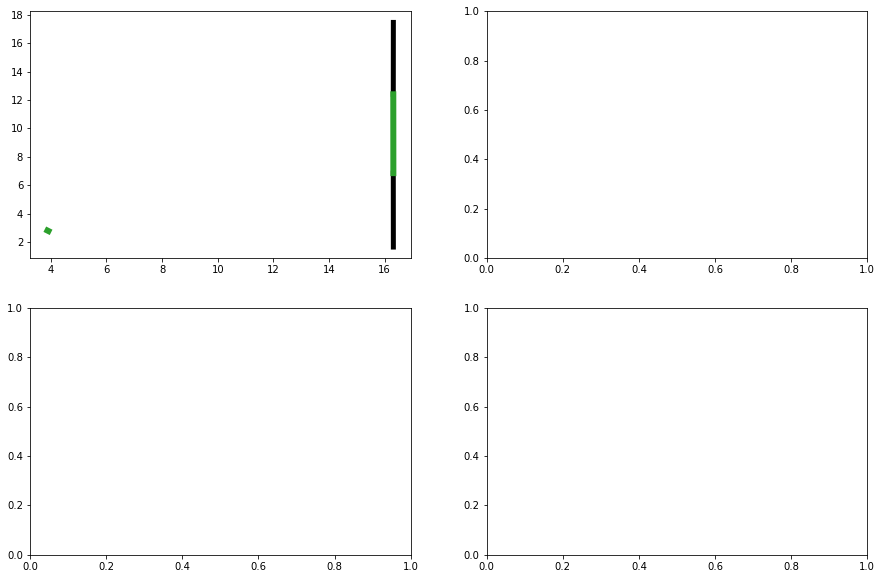

In [99]:
plt.subplots(2,2,figsize=(15,10))
fake_time = np.linspace(0,1,100)
wall_clusters = [[308+62,308+71],[1,16],[0,5],[0,5]]
odd_or_even_start = [0,0,0,0]
mouse = 'G6CK3LT'
for panelnum, data in enumerate([light, dark]):
    data = data[data['animal']==mouse]
    useindrange = wall_clusters[panelnum]
    useindrange = [int(np.floor(useindrange[0]/2)), int(np.floor(useindrange[1]/2))]
    useoddeven = odd_or_even_start[panelnum]
    if useoddeven==0:
        usedata = data[data.index%2==0] # odd
        leftcolor='g'; rightcolor='b'
        distkey = 'odd_dist_to_door1'
    elif useoddeven==1:
        usedata = data[data.index%2==1] # even
        leftcolor='b'; rightcolor='g'
        distkey = 'even_dist_to_door1'
    cluster_colors = plt.cm.magma(np.linspace(0,1,useindrange[1]-useindrange[0]))
    plt.subplot(2,2,panelnum+1)
    for ind in range(useindrange[0],useindrange[1]):
        door1 = np.nanmedian(flatten_series(usedata['door1']),0)
        # above door
        plt.plot([door1[0], door1[2]], [door1[3], np.mean(usedata['arenaTL_y_cm'].iloc[0])], '-', linewidth=5, color='k')
        # below door
        plt.plot([door1[0], door1[2]], [door1[1], np.mean(usedata['arenaBL_y_cm'].iloc[0])], '-', linewidth=5, color='k')
        # door
        plt.plot([door1[0], door1[2]], [door1[1], door1[3]], '-', linewidth=6, color='tab:green')
        if usedata['has_door2'].iloc[0]:
            door2 = np.nanmean(flatten_series(usedata['door2']),0)
            plt.plot([door2[0], door2[2]], [door2[1], door2[3]], '-', linewidth=6, color='tab:green')
        plt.plot(usedata['nose_x_cm'].iloc[ind], usedata['nose_y_cm'].iloc[ind], '-', color=cluster_colors[ind])
        plt.plot(usedata['leftportT_x_cm'].iloc[ind], usedata['leftportT_y_cm'].iloc[ind], '.', color=leftcolor)
        plt.plot(usedata['rightportT_x_cm'].iloc[ind], usedata['rightportT_y_cm'].iloc[ind], '.', color=rightcolor)
    plt.ylim([20.03,0]); plt.xlim([0,33.30])
    row = usedata.iloc[0]
    plt.plot([np.median(row['arenaTL_x_cm'],0),
            np.median(row['arenaTR_x_cm'],0),
            np.median(row['arenaBR_x_cm'],0),
            np.median(row['arenaBL_x_cm'],0),
            np.median(row['arenaTL_x_cm'],0)],
            [np.median(row['arenaTL_y_cm'],0),
            np.median(row['arenaTR_y_cm'],0),
            np.median(row['arenaBR_y_cm'],0),
            np.median(row['arenaBL_y_cm'],0),
            np.median(row['arenaTL_y_cm'],0)],'k-', linewidth=5)

for panelnum, data in enumerate([light, dark]):
    data = data[data['animal']==mouse]
    useindrange = wall_clusters[panelnum]
    useoddeven = odd_or_even_start[panelnum]
    if useoddeven==0:
        usedata = data[data.index%2==0] # odd
        leftcolor='g'; rightcolor='b'
        distkey = 'odd_dist_to_door1'
    elif useoddeven==1:
        usedata = data[data.index%2==1] # even
        leftcolor='b'; rightcolor='g'
        distkey = 'even_dist_to_door1'
    cluster_colors = plt.cm.magma(np.linspace(0,1,len(usedata)))
    colors = plt.cm.magma(np.linspace(0,1,len(usedata)))
    plt.subplot(2,2,panelnum+3)
    for ind in range(useindrange[0],useindrange[1]):
        doordist = usedata[distkey].iloc[ind]
        time = usedata['trail_timestamps'].iloc[ind]
        distinterp = interp1d(np.linspace(0,1,len(time)), doordist, bounds_error=False)(fake_time)
        plt.plot(fake_time, distinterp, color=cluster_colors[ind])

In [95]:
useindrange

[370, 379]

185

In [60]:
[door1[0], door1[2]], [door1[1], np.mean([usedata['arenaTL_y_cm'].iloc[0], usedata['arenaTR_y_cm'].iloc[0]])]

([17.22020863783331, 17.425989548785218],
 [8.107372252142184, 1.5281260073972267])

In [57]:
[door1[1], door1[3]]

[8.107372252142184, 6.655848850586715]